<a href="https://colab.research.google.com/github/Roshan4151/Roshan_Alte_Netflix_Movies_and_TV_Shows_Clustering_Capstone_Project.ipynb/blob/main/Roshan_Alte_Netflix_Movies_and_TV_Shows_Clustering_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Roshan Deepak Alte


# **Project Summary -**

* This dataset consists of tv shows and movies available on Netflix as of 2019. 
The dataset is collected from Flixable which is a third-party Netflix search engine.

* In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

* Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

* If Netflix has been increasingly focusing on TV rather than movies in recent years.
 
* This is a notbook to solve the tasks given with this dataset (see below). I want to try to build a cluster with the given movie / tv show descriptions to find similar movies / tv shows as a recommender system.

* Upon initially importing the data and inspecting the dataset, upon inspection we found there are 12 different variables they are show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description & found 7787 observations. We do not find any duplicate values.

* Performed the Exploratory data analysis and tried to get the understanding of the data and how the content is distributed in the dataset, its type and details such as which countries are watching more and which type of content is in demand etc. has been analyzed in this step with the help of visualization graph by getting insights from analysis.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import missingno as msno

from numpy import math
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

#word cloud imports 
from wordcloud import WordCloud, STOPWORDS

import re, string, unicodedata
import nltk

#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [2]:
#Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the DataSet
dataset = pd.read_csv('/content/drive/MyDrive/Netflix_Unsupervised_Clustering_Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
dataset.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
dataset.shape

(7787, 12)

In [7]:
# Name of the columns are present in the given dataset
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Information

In [8]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
null_values=dataset.isna().sum()
print(null_values)
# Sum of all the Null values in dataset
print(dataset.isna().sum().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
3631


Text(0.5, 0, 'Name of the feature')

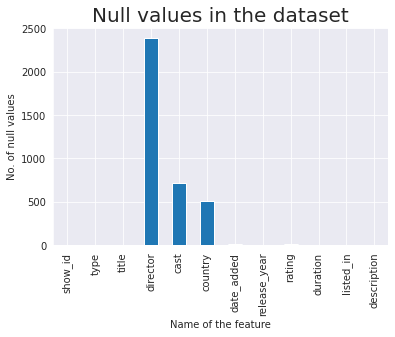

In [11]:
# Visualizing the missing values
null_values.plot(kind='bar')
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Null values in the dataset',fontsize=20)
plt.ylabel('No. of null values',fontsize=10)
plt.xlabel('Name of the feature',fontsize=10)

### What did you know about your dataset?

1.There are **7787** observations in the dataset and has **12** columns.

2.There are **no duplicate** values in the dataset.

3.There are **3631** missing values in the dataset, **2389** null values in director column, **718** null values in cast column, **507** null values in country column, **10** in date_added and **7** in rating.



## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe
dataset.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description 

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title: Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country: Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating: TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
dataset.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

# Droping or Handling Null values
dataset['director'].fillna(value='No director',inplace=True)
dataset['cast'].fillna(value='No cast',inplace=True)
dataset['country'].fillna(value='United States',inplace=True)

In [16]:
# Droping the null rows from the column 'data_added','rating'
dataset.dropna(subset=['date_added','rating'],inplace=True)

In [17]:
# Checking any null values are present there
dataset.isnull().sum() 

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
dataset.shape

(7770, 12)

In [19]:
# Convert the date_added column to a datetime format
dataset['date_added']=pd.to_datetime(dataset['date_added'])

# Adding a new column name as 'year_added'
dataset['year_added']=dataset['date_added'].dt.year
dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%        No director   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  
0  In a future where the elite inhabit an island ...        2020  
1  After a devastating earthquake hits Mexico Cit...        2016  
2  When an army recruit is found dead, his fellow...        2018  
3  In a postapocalyptic world, rag-doll robots hi...        2017  
4  A brilliant group of students become card-coun...        2020

In [20]:
# Creating seperate copies of Movies and TV shows
df1 = dataset.copy()
Netflix_tv_shows = df1[df1['type'] == 'TV Show']
Netflix_Movies = df1[df1['type'] == 'Movie']
print(Netflix_tv_shows.shape)
print(Netflix_Movies.shape)

(2398, 13)
(5372, 13)


### What all manipulations have you done and insights you found?

*   In the dataset,in the column of name **“director”**, **“cast”** and **“country”** contain the majority of null values, we chose to treat each missing value as **"No director"**, **"No cast"** and **"United States"** respectively.

*   The other two label **“date_added”** and **“rating”** contain an insignificant portion of the data, so it is good to **drop** them from the dataset.

*   Finally, we can see that there are **no more missing values** in the data frame.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

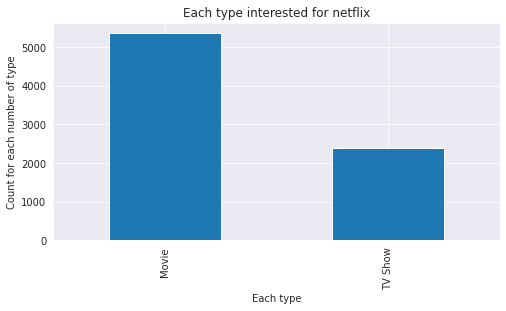

In [21]:
# Chart - 1 visualization code for Number of counts of TV shows & Movies on Netflix
plt.figure(figsize = (8, 4))

(dataset['type'].value_counts()).plot(kind='bar')

plt.title('Each type interested for netflix')

plt.xlabel('Each type')
plt.ylabel('Count for each number of type')

plt.show()

In [22]:
dataset['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

In [23]:
dataset['type'].value_counts('percentage')*100

Movie      69.137709
TV Show    30.862291
Name: type, dtype: float64

##### 1. Why did you pick the specific chart?

* I wants to check the number of items (movies & tv shows) are present in each type.

##### 2. What is/are the insight(s) found from the chart?



*   From the above the above the chart,we can clearly see that,The number of Movies are much more (i.e 5372) than the number of TV shows are there on Netflix.
*   There are far more Movie titles (69.1%) than TV Shows titles (30.9%) in terms of title



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*   Yes, the gained insights will help creating a positive business impact.
*   No, there is no any negative impact on growth.



#### Chart - 2

In [24]:
dataset['country'].value_counts().reset_index().iloc[:15]

index  country
0    United States     3051
1            India      923
2   United Kingdom      396
3            Japan      224
4      South Korea      183
5           Canada      177
6            Spain      134
7           France      115
8            Egypt      101
9           Turkey      100
10          Mexico      100
11       Australia       81
12          Taiwan       78
13          Brazil       72
14     Philippines       71

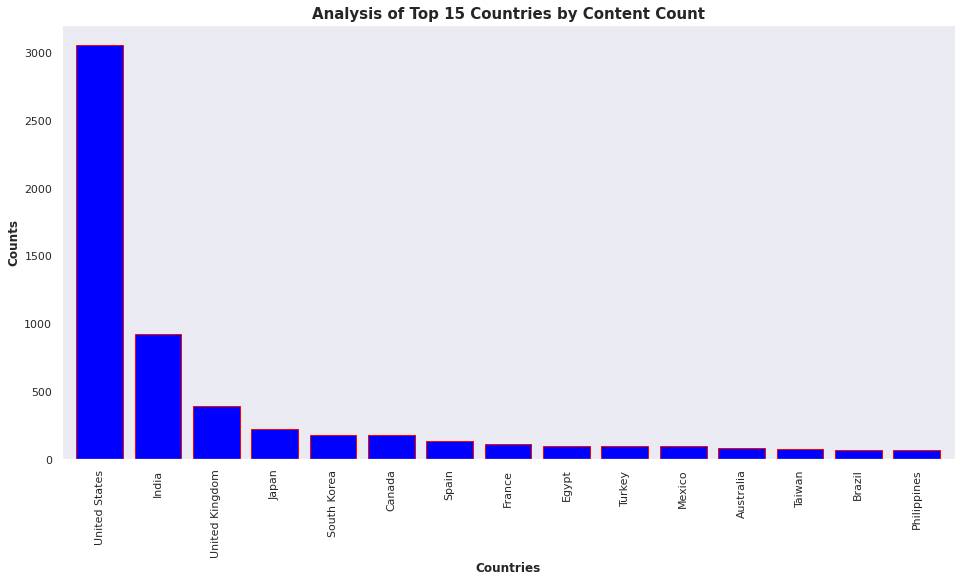

In [25]:
# Chart - 2 visualization code for Analysis of Top 15 Countries by Content Count
plt.figure(figsize=(16,8))
sns.set(style="dark")
top_countries = dataset['country'].value_counts().sort_values(ascending=False).iloc[:15]
top_countries.plot(kind = 'bar', color = 'blue', edgecolor='red',width=.8)

plt.title('Analysis of Top 15 Countries by Content Count', fontsize=15, fontweight='bold')
plt.xlabel('Countries', fontsize=12, fontweight='bold')
plt.ylabel('Counts', fontsize=12, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?



*   I picked this specific chart because it allows me to visualize the trend of Movies and TV shows popularity in different countries.




##### 2. What is/are the insight(s) found from the chart?



*   The chart shows the top 10 countries by content count on Netflix. The **United States** has the highest number of content, followed by **India** and the **United Kingdom**. Most of the top countries are English-speaking countries or countries where English is widely spoken, which indicates that Netflix has a significant English-speaking audience.








##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.



*   The gained insights can help Netflix to understand the demand and preferences of their audience in different countries, and allocate resources accordingly. The insights can also help Netflix in creating content that caters to the tastes of their audience in different countries.




#### Chart - 3

In [26]:
dataset['director'].value_counts().reset_index().iloc[1:21]


index  director
1   Raúl Campos, Jan Suter        18
2             Marcus Raboy        16
3                Jay Karas        14
4      Cathy Garcia-Molina        13
5          Martin Scorsese        12
6          Youssef Chahine        12
7              Jay Chapman        12
8         Steven Spielberg        10
9             David Dhawan         9
10        Robert Rodriguez         8
11       Quentin Tarantino         8
12              Johnnie To         8
13             Hakan Algül         8
14             Ryan Polito         8
15             Lance Bangs         8
16         Shannon Hartman         8
17          Kunle Afolayan         8
18        Don Michael Paul         7
19          Yılmaz Erdoğan         7
20            Ozan Açıktan         7

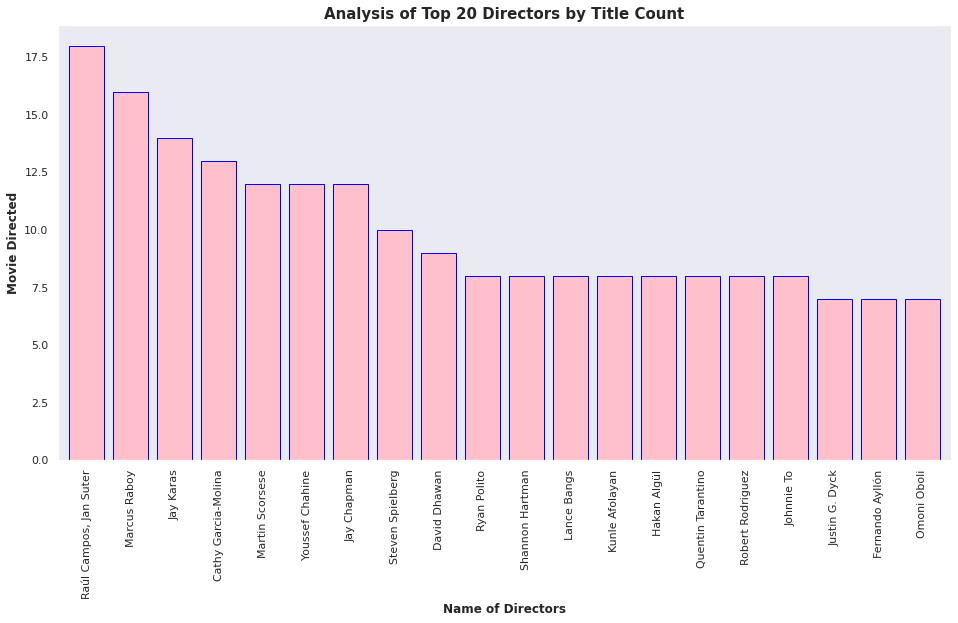

In [27]:
# Chart - 3 visualization code for Analysis of Top 20 Directors by Title Count
top_15_directors = dataset['director'].value_counts().sort_values(ascending=False).iloc[1:21]
plt.figure(figsize=(16,8))
sns.set(style="dark")
top_15_directors.plot(kind = 'bar', color = 'pink', edgecolor='blue',width=.8)
plt.title('Analysis of Top 20 Directors by Title Count', fontsize=15, fontweight='bold')
plt.xlabel('Name of Directors', fontsize=12, fontweight='bold')
plt.ylabel('Movie Directed', fontsize=12, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?



*   I picked this specific chart because it shows that **Top 20 directors** by the number of movies/TV shows they directed.




##### 2. What is/are the insight(s) found from the chart?



1.   The above bar graph shows the top 20 directors (both movies and TV shows) by number of titles.
 

*   From the bar graph, we know that Jan Sutar is in first place, followed by Raul Campos and Marcus Raboy. We can say, the director of the largest amount of material (both movies and TV shows) is **Jan Sutar**.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 4

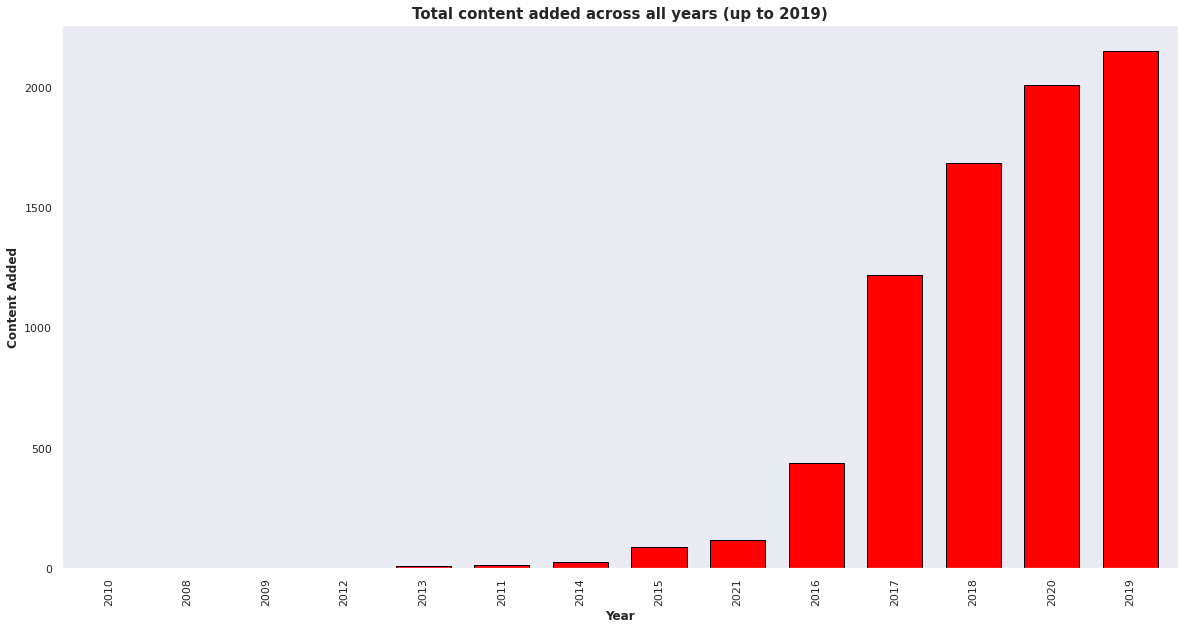

In [28]:
# Chart - 4 visualization code for Total content added across all years (up to 2019)

plt.figure(figsize=(20,10))
sns.set(style="dark")
dataset['year_added'].value_counts(ascending=True).plot(kind = 'bar', color = 'red', edgecolor='black',width=.7)
plt.title('Total content added across all years (up to 2019)', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Content Added', fontsize=12, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

* I picked this specific chart,to visiaulize the content, which added across all the years(up to 2019).

##### 2. What is/are the insight(s) found from the chart?

* From 2013 we can see a noticeable addition in the number of movies and tv shows uploaded by Netflix on its platform.
* The highest number of movies and tv shows got added in 2019 and 2020.
* But in 2021,very few content added it is due to very little or few data collected in 2021.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 5

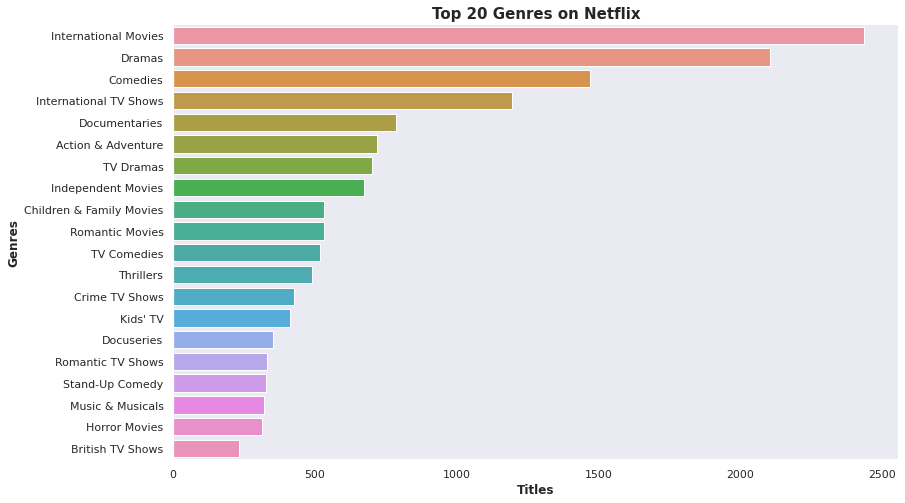

In [29]:
# Chart - 5 visualization code
# Analysing top 20 genres on Netflix
top_genres = dataset.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(13,8))
genres = sns.countplot(y = top_genres, order=top_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix',fontsize='15',fontweight='bold')
plt.xlabel('Titles',fontweight='bold')
plt.ylabel('Genres',fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

* To visualize the top 20 genres on Netflix by the number of titles.




##### 2. What is/are the insight(s) found from the chart?

1. The above graph shows the top 20 genres by number of titles (for both movies and TV shows).


*   From the above graph,we can clearly see that the **International Movies** ranks first followed by **Dramma** and **Commedies**.So we can say that,the **International Movies** are the most famous genre on the Netflix.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 6

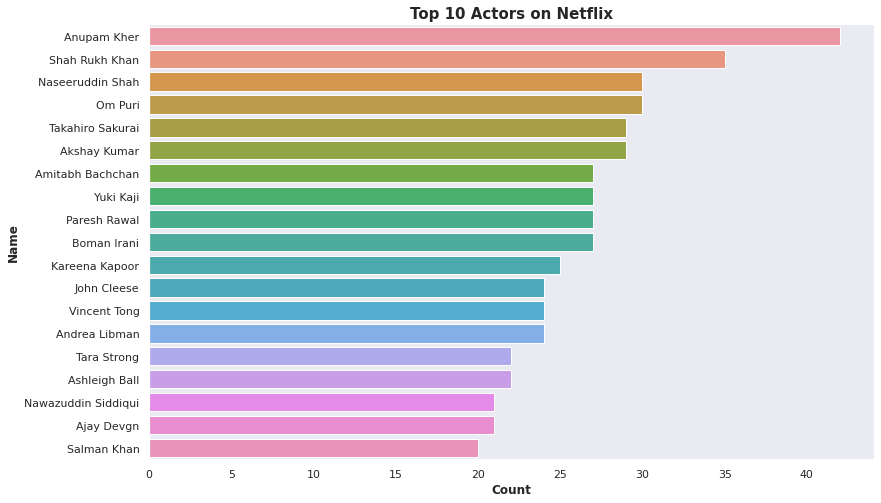

In [30]:
# Chart - 6 visualization code for Analysing top 10 actors on Netflix

top_actors = dataset.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(13,8))
actors = sns.countplot(y = top_actors, order=top_actors.value_counts().index[1:20])
plt.title('Top 10 Actors on Netflix',fontsize='15',fontweight='bold')
plt.xlabel('Count',fontweight='bold')
plt.ylabel('Name',fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

* I picked this specific chart,to visiaulize the top 10 actors by the number of titles(for both TV shows and Movies).

##### 2. What is/are the insight(s) found from the chart?

1. The above graph shows the top 10 actors by number of titles (for both movies and TV shows).
* From the above bar graph, we can clearly see that **Anupam Kher** is at the first position, followed by **Shah Rukh Khan** and **Om Puri**. Hence, **Anupam Kher** is the top actor on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 7

<Axes: xlabel='duration', ylabel='Density'>

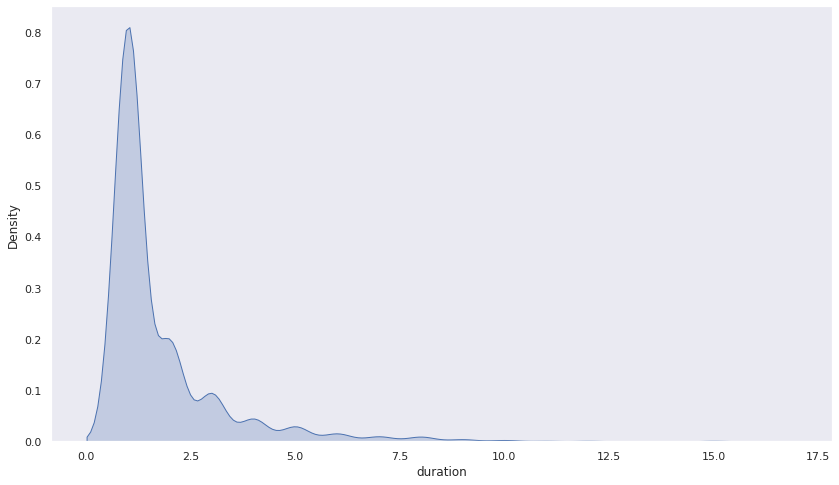

In [31]:
# Chart - 7 visualization code distribution of TV shows by there Duration
Netflix_tv_shows['duration']=Netflix_tv_shows['duration'].str.replace(' Season','')
Netflix_tv_shows['duration']=Netflix_tv_shows['duration'].str.replace(' Seasons','')
Netflix_tv_shows['duration']=Netflix_tv_shows['duration'].str.replace('s','')
Netflix_tv_shows['duration']=Netflix_tv_shows['duration'].astype(str).astype(int)
plt.figure(figsize=(14,8))
sns.kdeplot(data=Netflix_tv_shows['duration'], shade=True)

In [32]:
# Lets check the Statistics of TV shows in terms of seasons
Netflix_tv_shows.duration.describe()

count    2398.000000
mean        1.761468
std         1.561099
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: duration, dtype: float64

<Axes: xlabel='duration', ylabel='Density'>

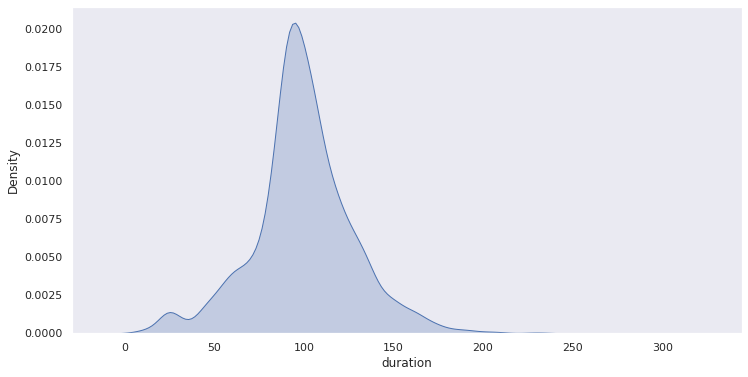

In [34]:
# Chart - 7 visualization code distribution of Movies by there Duration
Netflix_Movies['duration']=Netflix_Movies['duration'].str.replace(' min','')
Netflix_Movies['duration']=Netflix_Movies['duration'].astype(str).astype(int)
plt.plot(figsize=(14,8))
sns.kdeplot(data=Netflix_Movies['duration'],shade=True)

In [35]:
# Lets check the Statistics of Movies in terms of time(in min.)
Netflix_Movies.duration.describe()

count    5372.000000
mean       99.330417
std        28.524206
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

##### 1. Why did you pick the specific chart?

* I picked this specific chart to visualize the distribution of Movies/TV Shows by duration on Netflix.

##### 2. What is/are the insight(s) found from the chart?

1. The first disribution bar plot shows the distribution of TV shows by Seasons.


*   There are up to 16 seasons of TV shows on Netflix, although most of them only last one season. This could mean that most TV shows have started recently, and further seasons are on the way.
*   There are very few TV shows that have more than 6 seasons.


2. The second distribution bar shows the distrubution of Movies by duration.
 

*   On Netflix,the maximum length of movie is 312 minutes and minimum length is 3minutes.
*   The average length of movies is lies between 86 minutes to 114 minutes.
*   And there are very few movies that have duration of more than 170 minutes.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 8

In [36]:
re=dataset.year_added.value_counts()

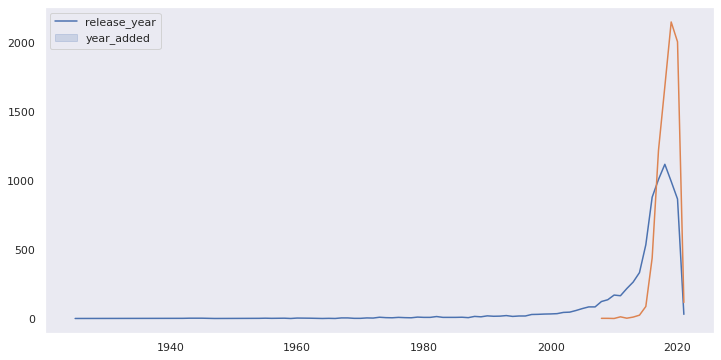

In [37]:
# Chart - 8 visualization code to check the diffrence between release year and added year
sns.lineplot(x=dataset.release_year.value_counts().index, y=dataset.release_year.value_counts().values)
sns.lineplot(x=dataset.year_added.value_counts().index, y=dataset.year_added.value_counts().values)
plt.legend(['release_year','year_added'])
plt.show()

##### 1. Why did you pick the specific chart?



*   I picked this specific chart beacause,I wants to check that the differencr between release year of content(both Movies and TV shows) and added year of that content on the Netflix.




##### 2. What is/are the insight(s) found from the chart?



*   From the above line chart,we can clearly see that the after **2017**,Netflix started adding lots of content on it(both Movies and TV shows).
*   And in **2019** and **2020** the number of content added are huge **2153** and **2009** respectively beacause of Lockdown due to Corona virus.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 9

In [38]:
dataset.rating.count()

7770

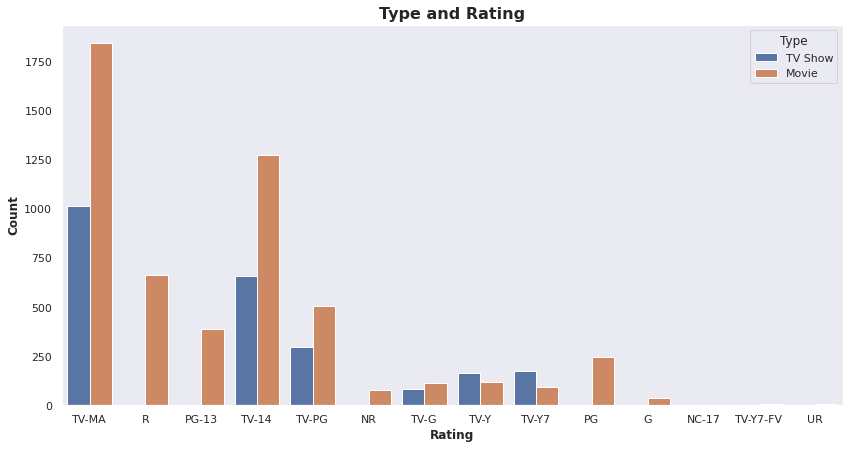

In [39]:
# Chart - 9 visualization code
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='rating',hue='type',data=dataset)
ax.set_title('Type and Rating', size=16, fontweight='bold')
ax.set_xlabel('Rating',fontweight='bold')
ax.set_ylabel('Count',fontweight='bold')
ax.legend(title='Type')

##### 1. Why did you pick the specific chart?

*    I picked this specific chart,to check the distribution of content(both Movies and TV shows) by there rating.

##### 2. What is/are the insight(s) found from the chart?

*   **TV-MA** is the most common rating for both movies and TV shows, followed by **TV-14** and **TV-PG**. There are relatively few movies rated **NC-17**, and no TV shows with this rating. Movies have a higher proportion of **G-rated** content compared to TV shows.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 10

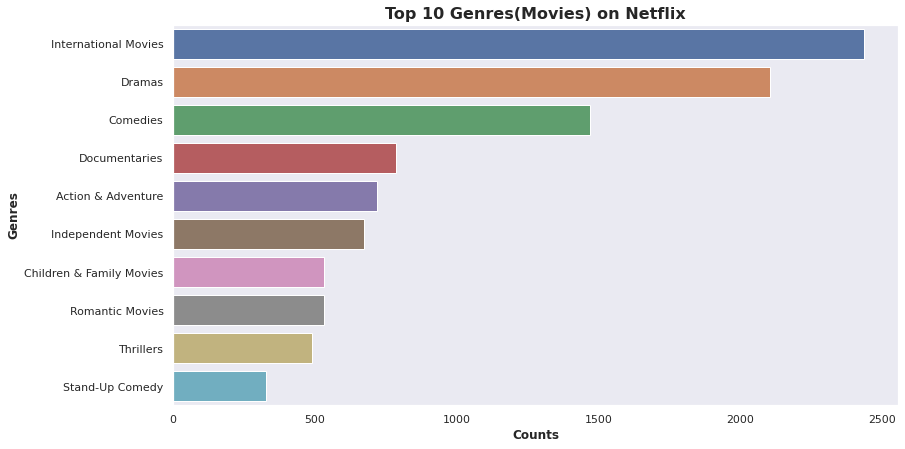

In [40]:
# Analysing top10 genres of the movies on Netflix
top_genres = Netflix_Movies.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(13,7))
g = sns.countplot(y = top_genres, order=top_genres.value_counts().index[:10])
plt.title('Top 10 Genres(Movies) on Netflix', size=16, fontweight='bold')
plt.xlabel('Counts',fontweight='bold')
plt.ylabel('Genres',fontweight='bold')
plt.show()

In [41]:
top_genres.reset_index()

title                     0
0                                         7:19                Dramas
1                                         7:19  International Movies
2                                        23:59         Horror Movies
3                                        23:59  International Movies
4                                            9    Action & Adventure
...                                        ...                   ...
11536                        Zulu Man in Japan         Documentaries
11537                        Zulu Man in Japan  International Movies
11538                        Zulu Man in Japan      Music & Musicals
11539  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS         Documentaries
11540  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS      Music & Musicals

[11541 rows x 2 columns]

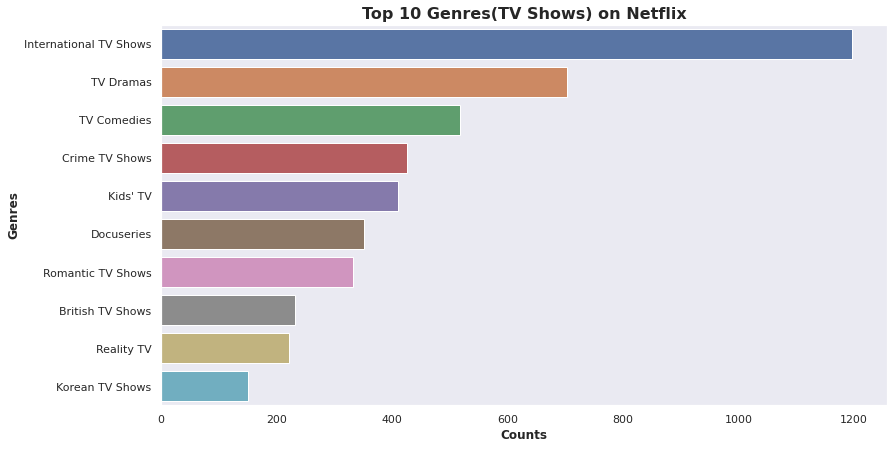

In [42]:
# Analysing top10 genres of the TV shows on Netflix
top_genres = Netflix_tv_shows.set_index('title').listed_in.str.split(', ',expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
g = sns.countplot(y = top_genres, order=top_genres.value_counts().index[:10])
plt.title('Top 10 Genres(TV Shows) on Netflix',size=16, fontweight='bold')
plt.xlabel('Counts',fontweight='bold')
plt.ylabel('Genres',fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

*   I picked this specific chart to visualize top genres(in both Movies & TV shows) on Netflix.

##### 2. What is/are the insight(s) found from the chart?

1. The above graphs shows the top 10 Genres by number of titles (for both movies and TV shows).

*   For movies only, we know that **International movies** rank first, followed by **Dramas** and **comedies**. Hence, we can say that **International movies** are the most popular genre on Netflix.
*   For TV Shows only, we know that **International TV Shows** are at the first position, followed by **TV Dramas** and **TV Comedies**. Hence, we can say that **International TV shows** are the most popular genre on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

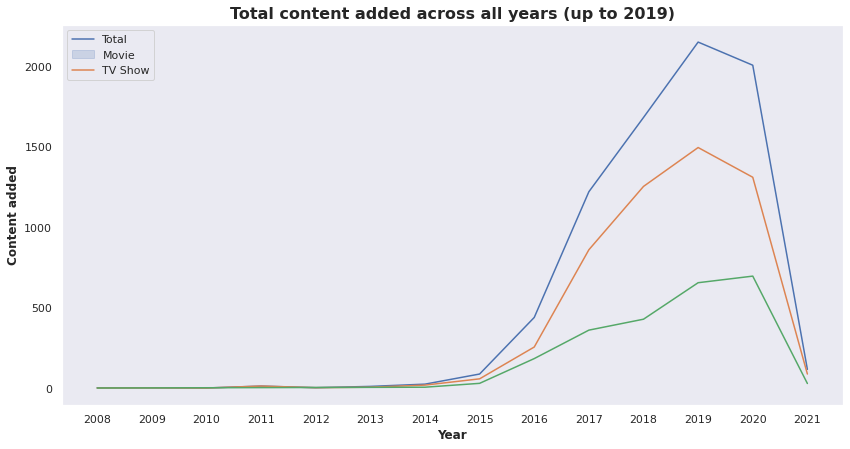

In [43]:
# Chart - 11 visualization code for the movies and tv_shows based on the added year.
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(x=dataset.year_added.value_counts().index, y=dataset.year_added.value_counts().values)
sns.lineplot(x=Netflix_Movies.year_added.value_counts().index, y=Netflix_Movies.year_added.value_counts().values)
sns.lineplot(x=Netflix_tv_shows.year_added.value_counts().index, y=Netflix_tv_shows.year_added.value_counts().values)
ax.set_xticks(np.arange(2008, 2022, 1))
plt.title('Total content added across all years (up to 2019)',size=16,fontweight='bold')
plt.legend(['Total','Movie','TV Show'])
plt.ylabel('Content added',fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

*   I picked this specific chart,to visualize the **Movies** and **TV Shows** based on wahich year they have added (upto 2019) on Nerflix.

##### 2. What is/are the insight(s) found from the chart?

1.   From the above Line chart,We can clearly say that-



*   The highest number of movies and tv shows got added in **2018** and **2019**.
*   Growth in the number of **movies** on Netflix is much higher than **tv shows**.
*   From **2013** we can see a noticeable addition in the number of movies and tv shows uploaded by Netflix.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 12

Text(0, 0.5, 'Rating Count')

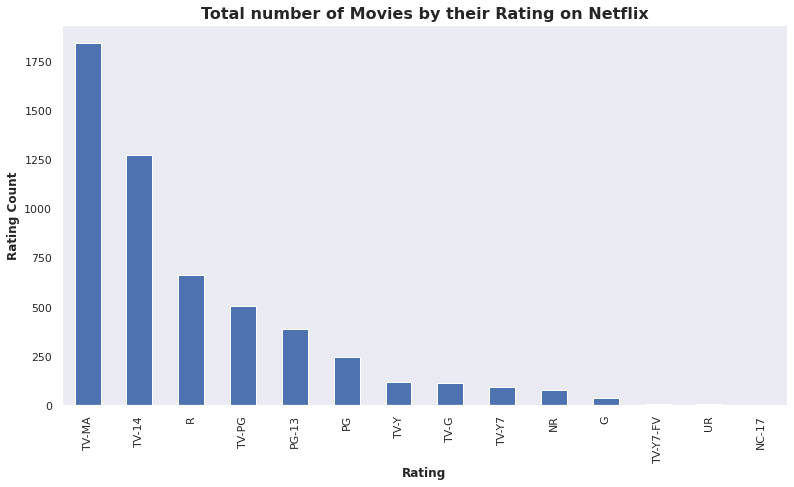

In [44]:
# Chart - 12 visualization code for count of Movies and TV shows on Netflix by their Ratings.
plt.figure(figsize=(13,7))
Netflix_Movies.rating.value_counts().plot(kind='bar')
plt.title('Total number of Movies by their Rating on Netflix',size=16,fontweight='bold')
plt.xlabel('Rating',fontweight='bold')
plt.ylabel('Rating Count',fontweight='bold')

Text(0, 0.5, 'Rating Count')

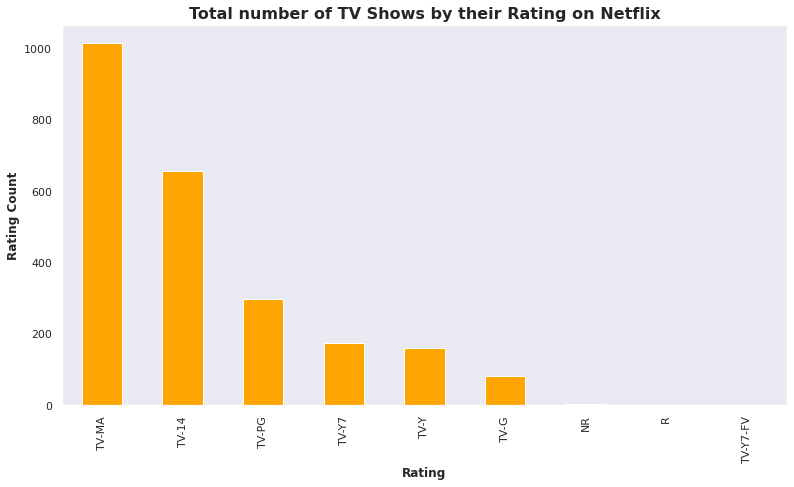

In [45]:
plt.figure(figsize=(13,7))
Netflix_tv_shows.rating.value_counts().plot(kind='bar',color='orange')
plt.title('Total number of TV Shows by their Rating on Netflix',size=16,fontweight='bold')
plt.xlabel('Rating',fontweight='bold')
plt.ylabel('Rating Count',fontweight='bold')

##### 1. Why did you pick the specific chart?

*   I picked this specific chart, To visualize the amount of **Netflix Movies and TV Shows** based on their **Rating**.

##### 2. What is/are the insight(s) found from the chart?

1.   The above graphs shows that the count of Movies and TV shows on Netflix by their Ratings respectively.

*   The highest number of Movies on Netflix rated as **''TV-MA''** followed by **''TV-14''** and **''R''**.
*   The highest number of TV Shows on Netflix rated as **''TV-MA''** followed by **''TV-14''** and **''TV-PG''**.
*   About 50% of the shows on Netflix are made for an **Adult audience**. Next come **Young adults**.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There is an insights that lead to negative growth, Because The ratings can be changed to age restrictions that apply on certain movies and TV shows.

#### Chart - 13

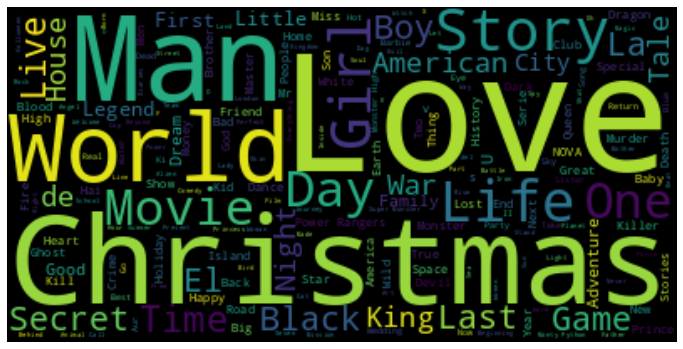

In [47]:
# Chart - 13 visualization code for Most occured words in Titles.
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

df_wordcloud = dataset['title']
text = " ".join(word for word in df_wordcloud)
#Create stopword list:

stopwords = set(STOPWORDS)
#Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
#Use the colormap to color the image

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

##### 1. Why did you pick the specific chart?

*   I picked this specific chart, to check the **Most Popular Words** in the Titles.

##### 2. What is/are the insight(s) found from the chart?

1.   From the above WordCloud we can say that-

*   The most occured words are in the titles are **Love**,**Christmas**,followed by **World**,**Man**,**Movies**,**Stoty**,etc.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 14 - Correlation Heatmap

In [48]:
dataset['principal_country'] = dataset['country'].apply(lambda x: x.split(",")[0])
rating_ages = {'TV-PG': 'Older Kids','TV-MA': 'Adults','TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids','TV-14': 'Young Adults', 'R': 'Adults', 'TV-Y': 'Kids',
    'NR': 'Adults', 'PG-13': 'Teens',  'TV-G': 'Kids', 'PG': 'Older Kids', 'G': 'Kids',
    'UR': 'Adults',    'NC-17': 'Adults'}
dataset['age_rating'] = dataset['rating'].replace(rating_ages)
# create a new column 'count' with a value of 1 for each row in the dataframe df
dataset['count'] = 1

# group the dataframe by 'principal_country', summing the 'count' column and sorting in descending order
# then select the top 10 countries and extract only their names
top_countries = dataset.groupby('principal_country')['count'].sum().nlargest(10).index.tolist()

# filter the dataframe to keep only the rows where 'principal_country' is in the top 10
df_heatmap = dataset[dataset['principal_country'].isin(top_countries)]

# create a pivot table with 'age_rating' as columns and 'principal_country' as rows,
# computing the percentage of each 'age_rating' category within each country
df_heatmap = pd.pivot_table(df_heatmap, values='count', index='principal_country', columns='age_rating', aggfunc='sum', fill_value=0)
df_heatmap = df_heatmap.div(df_heatmap.sum(axis=1), axis=0)

# transpose the table so that 'age_rating' becomes rows and 'principal_country' becomes columns
df_heatmap = df_heatmap.T

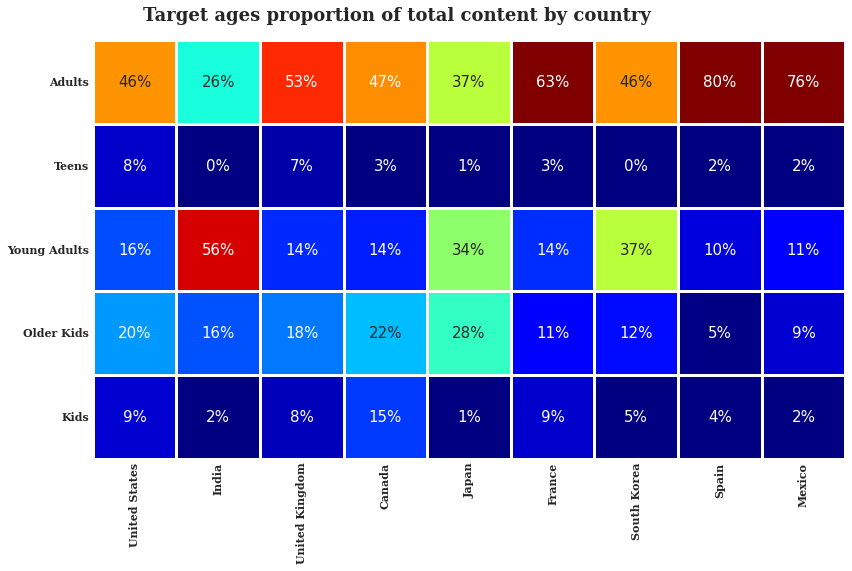

In [49]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="jet",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=18,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11,fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11,fontweight='bold')

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

*   It picked this because heatmap showing the proportion of content targeted at **different age groups** in **different Countries**.

##### 2. What is/are the insight(s) found from the chart?

1.   The Insights found from the above chart are as follows-

*   The **United States** has the highest proportion of content targeted at **Adults**, while **India** has the highest proportion of content targeted at **Older kids**. 
*   **South Korea** has the highest proportion of content targeted at **Teens**, while **Mexico** has the highest proportion of content targeted at **Young adults**. 
*   **France** has the highest proportion of content targeted at **Kids**.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

*   **Already handled the Null/Missing values from the dataset.**

In [50]:
# Handling Missing Values & Missing Value Imputation
# No need to deal with missing values beacause already handled that values

df = dataset.copy()
df.fillna('',inplace=True)

### 2. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [51]:
# Expand Contraction

# Now,lets combine all clustering attributes into one column

df['clustering_attributes'] = (df['director'] + ' ' + 
                                df['cast'] +' ' + 
                                df['country'] +' ' + 
                                df['listed_in'] +' ' + 
                                df['description'])

df['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

In [52]:
# Funtion to remove non-ascii characters

def remove_non_ascii(words):
  '''Function to remove non-ascii characters'''
  new_words = []
  for word in words:
    new_word = unicodedata.normalize('NFKD',word).encode('ascii','ignore').decode('utf-8','ignore')
    new_words.append(new_word)
  return new_words


# Apply above function on the dataset
df['clustering_attributes'] = remove_non_ascii(df['clustering_attributes'])

df['clustering_attributes'][40] 

'Muharrem Gulmez Erdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz Ozerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

#### 2. Removing Stop words and Lower Casing

In [53]:
# Romove Stopwords

# importing nltk for extraction of stopwords
import nltk
from nltk.corpus import stopwords 
sw = stopwords.words('english')

# printing all the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [54]:
# Function to remove Stopwords and Lower casing

def stopwords(text):
  '''A function to removing stopwords'''
  text = [word.lower() for word in text.split() if word.lower() not in sw]

  return " ".join(text)


# Removing the Stopwords
df['clustering_attributes'] = df['clustering_attributes'].apply(stopwords)
df['clustering_attributes'][40]

'muharrem gulmez erdem yener, ayhan tas, emin olcay, muharrem gulmez, elif nur kerkuk, tark papuccuoglu, suzan aksoy, doga konakoglu, esin eden, deniz ozerman turkey comedies, international movies slacker owner public bath house rallies community save big developer comes town close open new mall.'

#### 3. Removing Punctuations

In [55]:
# Remove Punctuations

# Function to remove punctuations
def remove_punctuation(text):
  '''A function for removing punctuation'''
  translator = str.maketrans('','',string.punctuation)
  return text.translate(translator)

In [56]:
# Removing the Punctuations
df['clustering_attributes'] = df['clustering_attributes'].apply(remove_punctuation)
df['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

#### 8. Text Normalization

In [57]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# Function to lemmatize the corpus
def lemmatize_verbs(words):
  '''A function to lemmatize verbs in list of tokenized words'''
  lemmatizer = WordNetLemmatizer()
  lemmas = []
  for word in words:
    lemma = lemmatizer.lemmatize(word,pos='v')
    lemmas.append(lemma)
  return lemmas


In [58]:
# Lemmatization
df['clustering_attributes'] = lemmatize_verbs(df['clustering_attributes'])
df['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

##### Which text normalization technique have you used and why?

*   We have used Lemmatization technique for text normalization Because lemmatization returns an actual word of the language, it is used where it is necessary to get valid words.

#### 7. Tokenization

In [59]:
# Tokenization
tokenizer = TweetTokenizer()

In [60]:
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

#### 10. Text Vectorization

In [61]:
# Vectorizing Text

# Vectorizing tokens saved in a variale
clustering_data = df['clustering_attributes']

In [62]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TF-IDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tfidf.fit_transform(clustering_data)    

In [63]:
X

<7770x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 238933 stored elements in Compressed Sparse Row format>

In [64]:
# Checking the shape of X
X.shape

(7770, 20000)

In [65]:
# DataType of the vector
type(X)

scipy.sparse._csr.csr_matrix

In [66]:
# Convert X into array form of clustering
X = X.toarray()

##### Which text vectorization technique have you used and why?

*   We have used **TF-IDF** vectorization technique for the text vectorization Because **TF-IDF** is to statistically measure how important a word is in a collection of documents.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

*   Yes, I think it is needed because It helps Remove multi-collinearity which improves the interpretation of the parameters of the machine learning model.

In [67]:
# DImensionality Reduction (If needed)

# Using PCA to reduce dimessionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

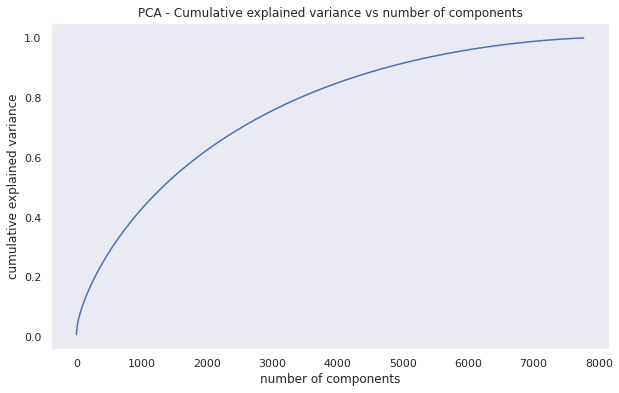

In [68]:
# Explained variance for different number of components
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [69]:
# Reducing the dimensions to 4000 using PCA
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

*   We have used PCA(Principal Component Analysis) technique for dimensionality reduction because It reduces the time and storage space required

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [70]:
# Transform Your data
# Transformed features
x_pca = pca.transform(X)

In [71]:
# Shape of the transfotmed vectors
x_pca.shape

(7770, 4000)

## ***7. ML Model Implementation***

### ML Model - 1

*   Now Lets, Build clusters using the K-means clustering algorithm.

*   Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

Text(0, 0.5, 'WCSS')

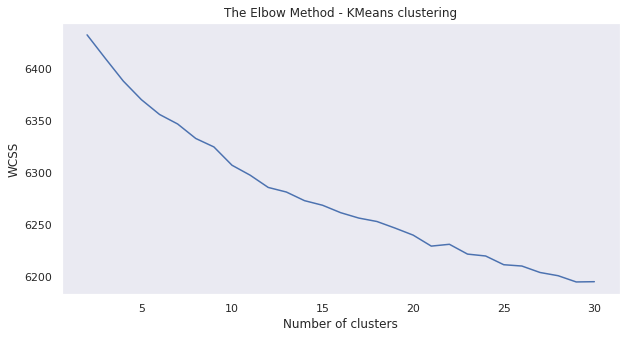

In [72]:
# ML Model - 1 Implementation

# Elbow method to find the optimal value of k
wcss=[]
for i in range(2,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(2,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

*  We know that,The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.

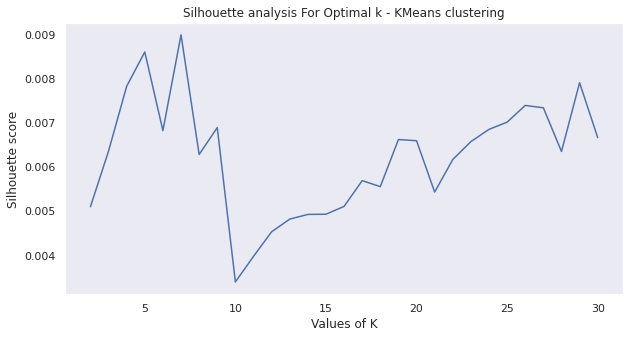

In [73]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [74]:
silhouette_avg

[0.005091453802121034,
 0.006351737645596335,
 0.007818867522765092,
 0.008595968082274186,
 0.0068148129661141435,
 0.008983457088319548,
 0.006273963075093153,
 0.006883301363018859,
 0.003387820508445899,
 0.0039665066383890776,
 0.00452341037162462,
 0.004810830672267914,
 0.004917072696489007,
 0.004921102866892327,
 0.005098895224356694,
 0.005681964529833935,
 0.005546201313231766,
 0.0066134179442652085,
 0.006585928771085262,
 0.005423101889702354,
 0.006160470085122686,
 0.006566201314218232,
 0.006843131668720591,
 0.0070071424125254765,
 0.007385071640971697,
 0.00733097602633323,
 0.006342624060211614,
 0.007899709782111918,
 0.006656347966650394]

*   The highest Shilhoute score is obtained fot **6** clusters.

*   Now we are building **6** clusters using the K-Means clustering Algorithm.

In [75]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++',random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=33)

In [76]:
# Evaluation metrics - Distortion, Silhoutte score
kmeans_distortion = kmeans.inertia_
kmeans_silhoutte_score = silhouette_score(x_pca,kmeans.labels_)

print((kmeans_distortion,kmeans_silhoutte_score))

(6355.801662209511, 0.0068148129661141435)


In [77]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

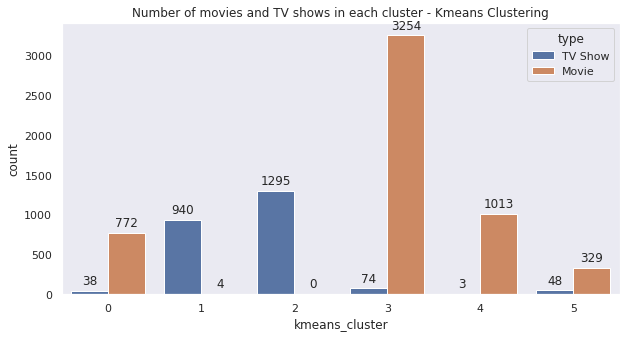

In [78]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [82]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['kmeans_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

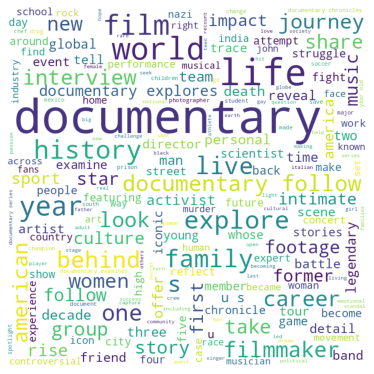

In [83]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)

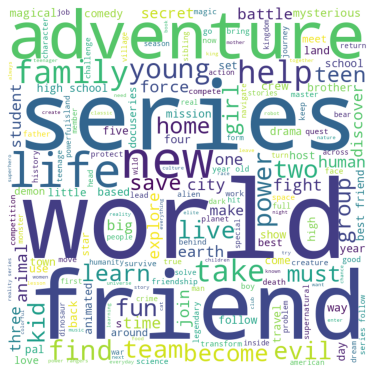

In [84]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

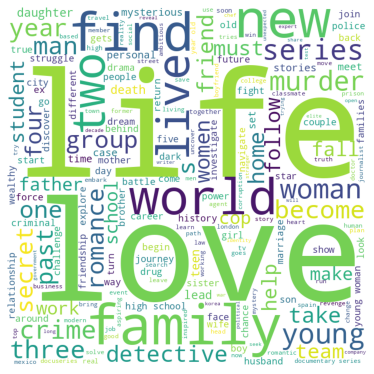

In [85]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

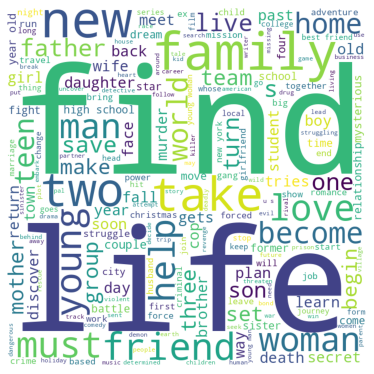

In [86]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

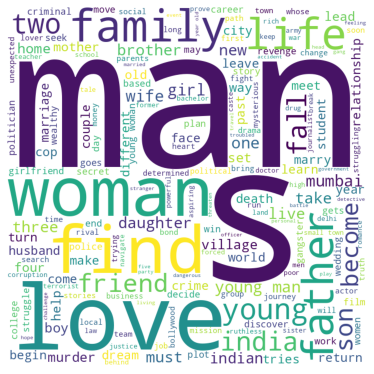

In [87]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)

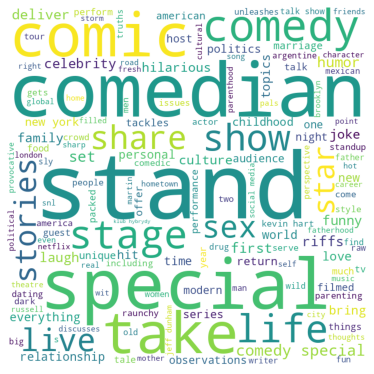

In [88]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

### ML Model - 2

*   Building clusters using the agglomerative (hierarchical) clustering algorithm.

*   Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:

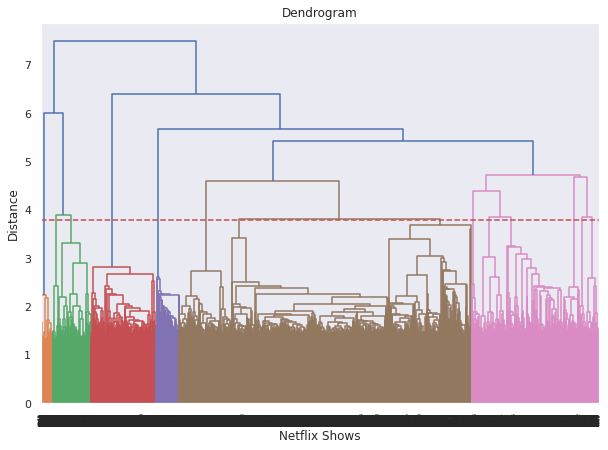

In [89]:
# ML Model -2: Implementation
# Building a Dendogram to decide on the number of clusters
plt.figure(figsize=(10,7))
dendo = shc.dendrogram(shc.linkage(x_pca,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

*   At a distance of 3.8 units, 12 clusters can be built using the agglomerative clustering algorithm.

*   Building 12 clusters using the Agglomerative clustering algorithm:

In [92]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x_pca)

array([ 2,  0, 11, ...,  1,  6,  1])

In [93]:
# Adding a kmeans cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

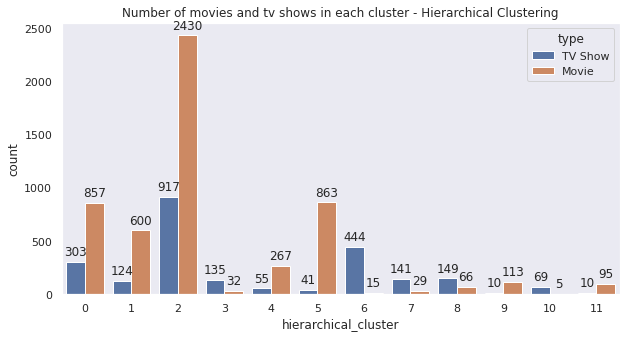

In [94]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

*   Successfully built 12 clusters using the Agglomerative (hierarchical) clustering algorithm.

*   Now, Building wordclouds for different clusters built:

In [95]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

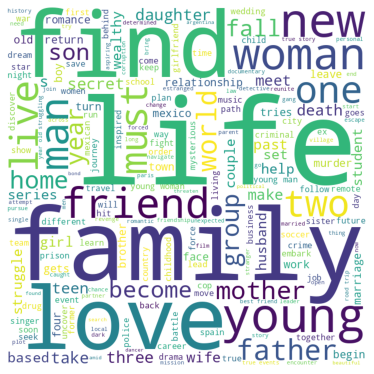

In [96]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

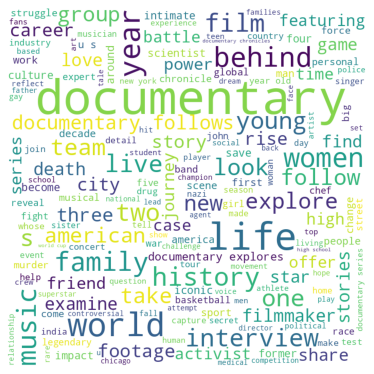

In [97]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

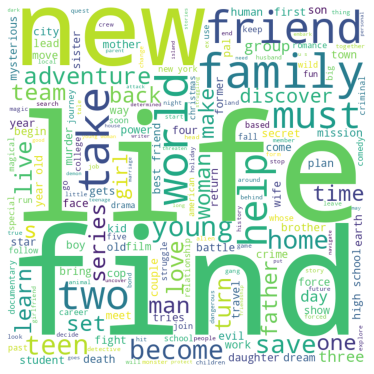

In [98]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

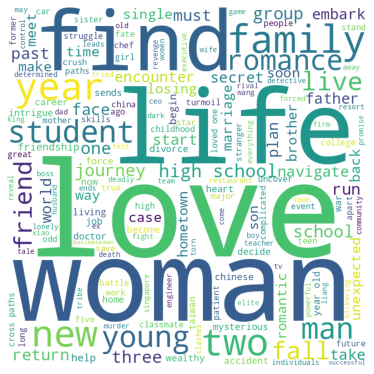

In [99]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

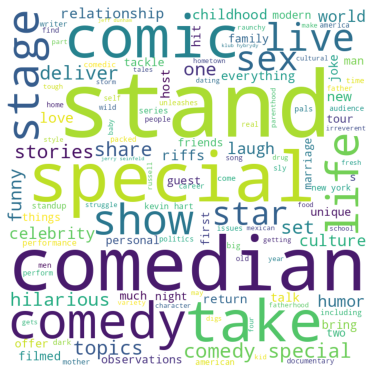

In [100]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

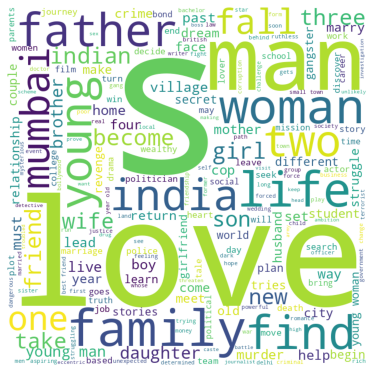

In [101]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

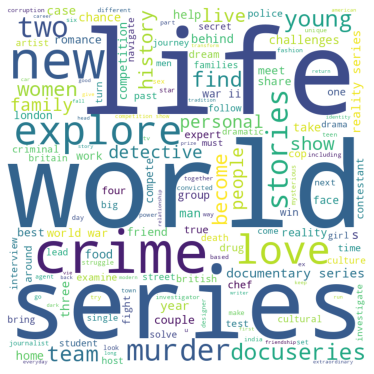

In [102]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

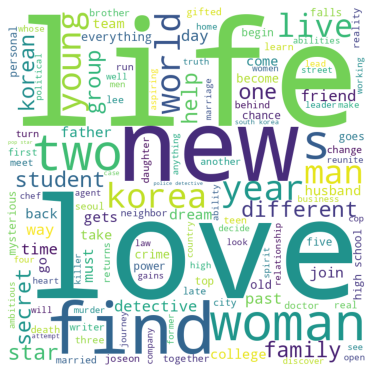

In [103]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

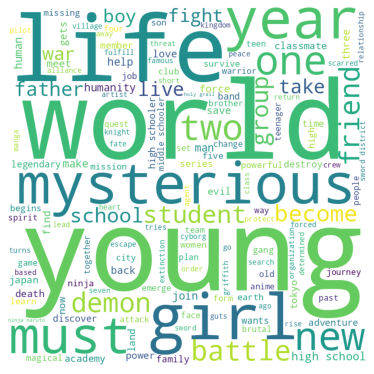

In [104]:
# Wordcloud for cluster 8
hierarchical_worldcloud(8)

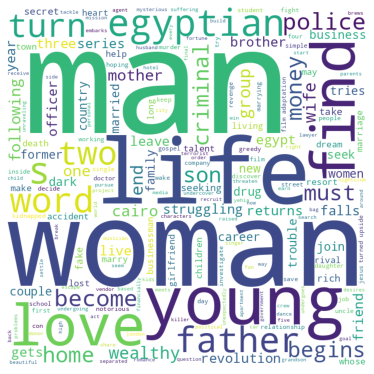

In [105]:
# Wordcloud for cluster 9
hierarchical_worldcloud(9)

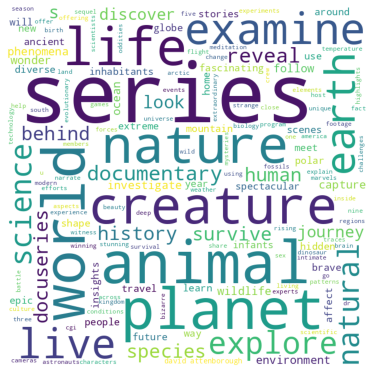

In [106]:
# Wordcloud for cluster 10
hierarchical_worldcloud(10)

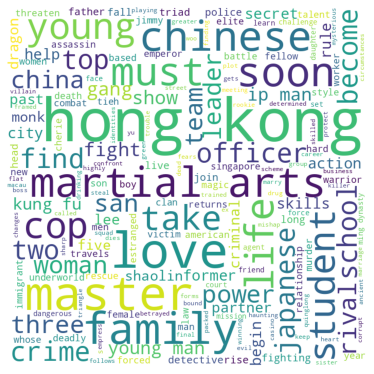

In [107]:
# Wordcloud for cluster 11
hierarchical_worldcloud(11)

# 1.  **Content Based Recommender System:**

*   Now, We can build a content based recommender system based on the similarity of the shows.
*   If a person watches a show on Netflix, then the Recommender system must be able to recommed a list of similar shows that the person like to watch.

In [108]:
# defining a new df for building a recommender system
recommender_sys = df.copy()

In [109]:
recommender_sys.head()

show_id     type  title           director  \
0      s1  TV Show     3%        No director   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  \
0  In a future where the elite inhabit an island ...        2020   
1  After a devastating earthquake hits Mexico Cit...        2016   
2  When an army recruit is found dead, his fellow...        2018   
3  In a postapocalyptic world, rag-doll robots hi...        2017   
4  A brilliant group of students become card-coun...        2020   

  principal_country age_rating  count  \
0            Brazil     Adults      1   
1            Mexico     Adults      1   
2         Singapore     Adults      1   
3     United States      Teens      1   
4     United States      Teens      1   

                               clustering_attributes  kmeans_cluster  \
0  [director, joao, miguel, bianca, comparato, mi...               2   
1  [jorge, michel, grau, demian, bichir, hector, ...               3   
2  [gilbert, chan, tedd, chan, stella, chung, hen...               3   
3  [shane, acker, elijah, wood, john, c, reilly, ...               3   
4  [robert, luketic, jim, sturgess, kevin, spacey...               3   

   hierarchical_cluster  
0                     2  
1                     0  
2                    11  
3                     2  
4                     2

In [110]:
# Changing the index of the df from show id to show title
recommender_sys['show_id'] = recommender_sys.index

In [111]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_sys['clustering_attributes'] = recommender_sys['clustering_attributes'].apply(lambda x: convert(x))

In [112]:
# setting title of movies/Tv shows as index
recommender_sys.set_index('title',inplace=True)

In [113]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_sys['clustering_attributes'])

In [114]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [115]:
# Checking the Shape
cosine_similarity.shape

(7770, 7770)

In [116]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_sys.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_sys.index)[i])
    print("If you liked '"+title+"', you may also watch to enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [117]:
# Recommendations for 'Peaky Blinders'
recommend_10('Peaky Blinders')

If you liked 'Peaky Blinders', you may also watch to enjoy:



['Kiss Me First',
 'Happy Valley',
 'The Frankenstein Chronicles',
 'Paranoid',
 'Get Even',
 'Giri / Haji',
 'London Spy',
 'My Hotter Half',
 'The Murder Detectives',
 'Safe']

In [118]:
# Recommendations for '21'
recommend_10('21')

If you liked '21', you may also watch to enjoy:



['How to Get Away with Murder',
 'Event Horizon',
 'Jack Whitehall: At Large',
 'Moon',
 'Balto',
 "Legend of the Guardians: The Owls of Ga'Hoole",
 'American Beauty',
 'The Fighter',
 'Outlaw King',
 'Kidnapping Mr. Heineken']

In [119]:
# Recommendations for 'xyz'
recommend_10('xyz')

'Invalid Entry'

# **Conclusion**

*   In this dataset, there are two types of content: TV shows and movies. TV shows constitute 30.86% of the content, whereas the remaining 69.14% is comprised of movies.

*   The popular streaming platform gained traction after 2014, and since then, the number of content additions has been increasing significantly. This implies that the platform's popularity has been growing over the years, resulting in more content being added.

*   The United States has produced the most amount of content on Netflix, followed by India. This suggests that these two countries are the major contributors to the platform's content.

*   Jan Suter is the most popular director on Netflix, with the highest number of titles, followed by Raul Campos. This implies that these directors have directed the most number of titles on the platform.

*   The top three content categories on Netflix are international movies, dramas, and comedies. This means that these categories are the most popular among the audience.

*   We worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

*   Speaking about the alternative clustering techniques, we found the optimal cluster arrangements using K mean clustering on the data.
Optimal number of cluster = 6


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***